## Intro
Public schools were already known in antiquity and many societies developed them for years to finally end up with mandatory public schools in the XIX century. It seems natural that having in mind how important education is, countries started to compete in this discipline and compare themselves to each other as well. Modern societies acknowledged that education is a key element of their future wellbeing, so that is why many of them are interested in constructing the system to outcompete the rest. 

<b style="background-color: red"> At this point there’s probably no one who denies advantages of high educated society,  so everybody wants know, how to custom made the system to win this race </b>. 

One of the questions one might want to ask is can we tell that there is a relationship between countries wealth or its spending on education and the <b style="background-color: red"> intelligence of its population?</b> To answer this question you have to first think how to measure the level of key abilities people can have in order to perform better in life in general. I think that PISA results can be a good proxy for that measure and the reason why will be explained later in the text. On the other hand, each country's wealth can be described by GDP per capita indicator and expenses on education can be captured by spendings per student. In this paper I’m planning to start with an analysis of correlation between PISA results and countries’ GDP per capita to answer a simple question - do richer countries perform better in the assessment? The second step is to estimate average cost per student during 12 years of education, which will be based on government expenses on education on pre-primary, primary and secondary levels. This should bring me a bit closer to answering another question - does higher public expenses influence exam results positively?

## What is PISA?
The OECD Programme for International Student Assessment (PISA) assesses the extent to which 15-year-old students, near the end of their compulsory education, have acquired key knowledge and skills that are essential for full participation in modern societies. The assessment focuses on the core school subjects of science, reading and mathematics. The assessment does not just ascertain whether students can reproduce knowledge; it also examines how well students can extrapolate from what they have learned and can apply that knowledge in unfamiliar settings, both in and outside of school. This approach reflects the fact that modern economies reward individuals not for what they know, but for what they can do with what they know. The findings from PISA allow policy makers around the world to gauge the knowledge and skills of students in their own countries in comparison with those in other countries, set policy targets against measurable goals achieved by other education systems, and learn from policies and practices applied elsewhere. 

The most interesting findings from the latest 2015 report are that:
- Singapore outperforms all other participating countries/economies in science. Japan, Estonia, Finland and Canada are the four highest-performing OECD countries.
- Nearly 20% of students in OECD countries, on average, do not attain the baseline level of proficiency in reading. This proportion has remained stable since 2009 [1, p.3-4].

## Extracting PISA dataset
<b style="background-color: red"> dodać 1 zdanie wstepu. That's mainly why I decided to base my project on pandas data frames. </b>
<a href="https://pandas.pydata.org/pandas-docs/stable/"> pandas </a> is a Python package providing fast, flexible and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python [4]. 

<b style="background-color: red"> Here are the library inport that's gonna be used in the project'. This is the list of necessary libriaries </b>

In [7]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib.pyplot as plt

First I read in multiple csv files with separate PISA results for science, reading and mathematics from OECD database [3]. I used form of a dictionary with ‘string exam name’ keys and ‘data frame results’ values to pre-analyze the structure of all of them at one time. 

Zmienic na cos w stylu : To process OECD data we need to first read in 
Here we can use a dict with ;; and ;;
Link to csv files

In [8]:
def read_multi_csv_data(files_list):
    """Read multi csv files from pisaprojectdatafiles directory and
    create df_data dictionary containing separate data frames
    :param files_list: list of csv files
    :returns df_data: dict with name keys and data frames values"""
    df_data = {}
    for f in files_list:
        d = pd.read_csv('pisaprojectdatafiles/{0}'.format(f))
        df_data[f.replace('.csv', '')] = d
    return df_data

#read in files with PISA results, separate for every subject (all years)
pisa_data = read_multi_csv_data(['pisa_math_2003_2015.csv', 'pisa_read_2000_2015.csv', 'pisa_science_2006_2015.csv'])

In [9]:
def show_dict_summary(dict):
    """Print name, head and tail for each df in a dict
    :param dict: dictionary with name keys and data frames values"""
    for k, v in dict.items():
        print('\n' + k + '\n')
        print(v.head())
        print(v.tail())

#show summary of PISA results
show_dict_summary(pisa_data)


pisa_math_2003_2015

  LOCATION INDICATOR SUBJECT    MEASURE FREQUENCY  TIME  Value  Flag Codes
0      AUS  PISAMATH     TOT  MEANSCORE         A  2003    524         NaN
1      AUS  PISAMATH     TOT  MEANSCORE         A  2006    520         NaN
2      AUS  PISAMATH     TOT  MEANSCORE         A  2009    514         NaN
3      AUS  PISAMATH     TOT  MEANSCORE         A  2012    504         NaN
4      AUS  PISAMATH     TOT  MEANSCORE         A  2015    494         NaN
    LOCATION INDICATOR SUBJECT    MEASURE FREQUENCY  TIME  Value  Flag Codes
189      HKG  PISAMATH     TOT  MEANSCORE         A  2015    548         NaN
190      PER  PISAMATH     TOT  MEANSCORE         A  2015    387         NaN
191      SGP  PISAMATH     TOT  MEANSCORE         A  2015    564         NaN
192      TWN  PISAMATH     TOT  MEANSCORE         A  2015    542         NaN
193      MAC  PISAMATH     TOT  MEANSCORE         A  2015    544         NaN

pisa_read_2000_2015

  LOCATION INDICATOR SUBJECT    MEASURE FREQ

Raw data frames consists a lot of irrelevant features. Next I performed some cleansing by dropping irrelevant columns and renaming existing ones. 
Lets perform

In [10]:
def drop_dict_col(dict, del_col):
    """In each df in a dict delete del_col columns
    :param dict: dictionary with name keys and data frames values
    :param del_col: list"""
    for k, v in dict.items():
        for i in del_col:
            v.drop(i, axis=1, inplace=True)
            
#leave only columns with location, time and value for test result
drop_dict_col(pisa_data, ['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'])

In [11]:
def rename_dict_col(dict, new_col):
    """Rename columns in each df in a dict
    :param dict: dictionary with name keys and data frames values
    :param new_col: dict
    """
    for k, v in dict.items():
        v.rename(columns=new_col, inplace=True)

#rename columns
rename_dict_col(pisa_data, {'LOCATION': 'Code', 'Value': 'test_score', 'TIME': 'Time'})

The analysis is based on the latest test results, which were collected in 2015. I extracted those rows for every test part and then merged all the results in one data frame. 

Troche wiecej napisac o tym, ze zmienilo sie ze slowika na df

In [12]:
def filter_dict_by_year(dict, year):
    """Create a copy of dict and extract rows with a given year
    :param dict: dictionary with name keys and data frames values
    :param year: int
    :returns dict_year: dictionary with name keys and data frames values
    """
    dict_year = dict.copy()
    for k, v in dict_year.items():
        v = dict_year[k]
        v = v[v['Time'] == year]
        dict_year[k] = v
    return dict_year

#extract PISA results for 2015
pisa_2015 = filter_dict_by_year(pisa_data, 2015)

def merge_dict_by_year(dict_year):
    """Take dict_year and merge each df in one data frame based on Code, then drop columns with year number
    :param dict_year: dictionary with name keys and data frames values
    :returns df_data_joined: data frame"""
    df_data_joined = pd.DataFrame()
    for k, v in dict_year.items():
        if not df_data_joined.empty:
            df_data_joined = pd.merge(df_data_joined, v, on='Code')
        else:
            df_data_joined = df_data_joined.append(v)
    df_data_joined.drop(df_data_joined.columns[[1, 3, 5]], axis=1, inplace=True)
    return df_data_joined

#join all tests' results from 2015
all_pisa_2015 = merge_dict_by_year(pisa_2015)

def rename_col(df_data, new_col):
    """Take df_data and rename new_col columns
    :param df_data: df
    :param new_col: dict"""
    df_data.rename(columns=new_col, inplace=True)
    return df_data

#rename column labels
rename_col(all_pisa_2015, {'test_score_x': 'math', 'test_score_y': 'read', 'test_score': 'science'})

,Code,math,read,science
0,AUS,494,503,510
1,AUT,497,485,495
2,BEL,507,499,502
3,CAN,516,527,528
4,CZE,492,487,493
5,DNK,511,500,502
6,FIN,511,526,531
7,FRA,493,499,495
8,DEU,506,509,509
9,GRC,454,467,455


It seemed necessary to include countries’ names in the data frames, because short codes may often seem ambiguous for various readers. To achieve that goal I created a map converting from country alpha3 code to country name using pycountry library. It also required some adjustments, as it turns out countries’ names vary a lot among different databases (By the way, did you hear about Czechia? https://www.forbes.com/sites/francistapon/2017/05/22/czechia-has-won-the-czech-republic-name-debate/#a49f1d17d664)

In [13]:
def name_code_mapper():
    """Use pycountry library to create a map for converting from country name to country code
    :returns map: dict"""
    map = {country.name: country.alpha_3 for country in pycountry.countries}
    map_adjust = {'Czech Republic': 'CZE', 'Hong Kong SAR, China': 'HKG', 'Korea, Rep.': 'KOR',
                      'Macao SAR, China': 'MAC', 'OECD members': 'OED', 'Slovak Republic': 'SVK',
                  'China, Hong Kong Special Administrative Region': 'HKG', 'China, Macao Special Administrative Region': 'MAC',
                  'Republic of Korea': 'KOR', 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                  'United States of America': 'USA', 'OECD members': 'OAVG'}
    map.update(map_adjust)
    return map

def code_name_mapper(map):
    """Reverse other map for converting from country code to country name
    :param map: dict
    :returns reversed_map: dict"""
    reversed_map = dict(zip(map.values(), map.keys()))
    return reversed_map

def add_country_col(df_data, map):
    """Take df_data, add a column with country name and fill it using map
    :param df_data: data frame
    :param map: dict"""
    mapper = lambda x: map[x]
    df_data.insert(loc=0, column='Country', value=df_data.loc[:, 'Code'].copy())
    df_data['Country'] = df_data['Country'].apply(mapper)
    return df_data

#add column with country name
name_code_map = name_code_mapper()
code_name_map = code_name_mapper(name_code_map)
add_country_col(all_pisa_2015, code_name_map)

,Country,Code,math,read,science
0,Australia,AUS,494,503,510
1,Austria,AUT,497,485,495
2,Belgium,BEL,507,499,502
3,Canada,CAN,516,527,528
4,Czech Republic,CZE,492,487,493
5,Denmark,DNK,511,500,502
6,Finland,FIN,511,526,531
7,France,FRA,493,499,495
8,Germany,DEU,506,509,509
9,Greece,GRC,454,467,455


As a final step I calculated average test result for each country. It seemed more transparent for the pre-analysis to skip analyzing relation in results between each exam part. Considering 2015 exam edition was designed to emphasize the science part (students spent one hour on the science assessment plus one hour on two other subjects [2, p. 13]) I used the following formula to calculate the average country score: 
average_score = (2 * science_score + reading_score + math_score) / 4

zastanowic sie nad formula sredniej

In [14]:
def get_average(df_data):
    """Take df_data and calculate average pisa result for a given country,
    use formula: (math+read+2*science)/4
    :param df_data: data frame
    :return df_data_new: data frame
    """
    df_data_new = df_data.copy()
    df_data_new.insert(loc=2, column='ave_result', value=0)
    df_data_new['ave_result'] = round((df_data['math'] + df_data['read'] + 2 * df_data['science'])/4, 0)
    df_data_new.drop(['math', 'read', 'science'], axis=1, inplace=True)
    return df_data_new

#get average pisa result for every country -> use formala (2*science + math+read)/4
all_pisa_2015_ave = get_average(all_pisa_2015)

In [15]:
all_pisa_2015_ave
#ascending order

,Country,Code,ave_result
0,Australia,AUS,504.0
1,Austria,AUT,493.0
2,Belgium,BEL,502.0
3,Canada,CAN,525.0
4,Czech Republic,CZE,491.0
5,Denmark,DNK,504.0
6,Finland,FIN,525.0
7,France,FRA,496.0
8,Germany,DEU,508.0
9,Greece,GRC,458.0


## Extracting GDP dataset 
First of all I generated a list of codes for countries I had PISA test results for. I used that list as an argument for accessing GDP data with a great help of World Bank API. This API enables you to load your data directly to Python shell knowing which indicators you’re interested in. To learn more about this helpful tool go to https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata and http://wbdata.readthedocs.io/en/latest/

In [16]:
def get_codes_list(df_data):
    """Create a list of countries code from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: dataframe
    :returns codes_list: list"""
    codes_list = df_data['Code'].tolist()
    codes_list.remove('OAVG')
    codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
countries_codes = get_codes_list(all_pisa_2015)

def api_data(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multiindex df
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = api_data(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2003, 2015)

I used GDP per capita PPP based as my indicator, because it enables better comparison between countries wealth. If you are not familiar with the difference between nominal and purchasing power parity GDP I suggest reading this article https://applebutterdreams.wordpress.com/the-difference-between-gdp-nominal-and-gdp-ppp/


GDP data from World Bank API came as a multiindex data frame. I decided to reset it and use column labels to perform various operations. Again I filtered data by year and add country code using reversed map this time. 

In [17]:
def filter_by_year(df_data, year):
    """Create a copy of df_data and extrac rows for a particular year
    :param df_data: data frame
    :param year: str
    :returns df_data_year: data frame"""
    df_data_year = df_data.xs(year, level='date').copy()
    return df_data_year

#get GDP PPP for 2015
gdp_ppp_2015 = filter_by_year(gdp_ppp, '2015')

#reset index "country'
gdp_ppp_2015.reset_index(level=['country'], inplace=True)

#rename column label
rename_col(gdp_ppp_2015, {'country': 'Country'})

def add_code_col(df_data, map):
    """Take df_data, add a column with country code and fill it using map
    :param df_data: data frame
    :param map: dict"""
    mapper = lambda x: map[x]
    df_data.insert(loc=1, column='Code', value=df_data.loc[:, 'Country'].copy())
    df_data['Code'] = df_data['Code'].apply(mapper)
    return df_data

#add column with country code
add_code_col(gdp_ppp_2015, name_code_map)

,Country,Code,gdp_ppp
0,Australia,AUS,43832.426221
1,Austria,AUT,44074.947745
2,Belgium,BEL,41723.123728
3,Brazil,BRA,14666.018168
4,Canada,CAN,42983.100056
5,Switzerland,CHE,56510.860646
6,Chile,CHL,22536.617688
7,Colombia,COL,12985.383135
8,Czech Republic,CZE,30380.590732
9,Germany,DEU,43784.148096


## Ordinary Least Squares for average PISA results and GDP per capita
Before calculating coefficients I decided to take log of GDP data to enable estimation by linear regression. 

Dac link do OLS
rozdzielic paragrafy

In [18]:
def merge_df(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2, on='Code')
    df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data
pisa_ave_gdp_ppp = merge_df(all_pisa_2015_ave, gdp_ppp_2015)

#rename column label
rename_col(pisa_ave_gdp_ppp, {'Country_x': 'Country'})

def take_log(df_data, columns):
    """Takes values from columns labels and transform them to log
    :param df_data: data frame
    :param columns: list of str"""
    log_data = df_data.copy()
    for i in columns:
        log_data[i] = np.log(log_data[i])
    return log_data

#take log from GDP values
pisa_ave_gdp_ppp_log = take_log(pisa_ave_gdp_ppp, ['gdp_ppp'])
rename_col(pisa_ave_gdp_ppp_log, {'gdp_ppp': 'gdp_ppp_log'})

,Country,Code,ave_result,gdp_ppp_log
0,Australia,AUS,504.0,10.688129
1,Austria,AUT,493.0,10.693647
2,Belgium,BEL,502.0,10.638811
3,Canada,CAN,525.0,10.668562
4,Czech Republic,CZE,491.0,10.321559
5,Denmark,DNK,504.0,10.725111
6,Finland,FIN,525.0,10.571155
7,France,FRA,496.0,10.539158
8,Germany,DEU,508.0,10.687027
9,Greece,GRC,458.0,10.089751


In [19]:
#perform OLS
model_ave_gdp_ppp_log = smf.ols(formula='ave_result ~ gdp_ppp_log', data=pisa_ave_gdp_ppp_log).fit()

#show summary
model_ave_gdp_ppp_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ave_result   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     64.95
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           5.50e-10
Time:                        19:05:20   Log-Likelihood:                -197.37
No. Observations:                  43   AIC:                             398.7
Df Residuals:                      41   BIC:                             402.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -142.0402     78.123     -1.818      0.076    -299.813      15.732
gdp_ppp_log    60.1889      7.469      8.059      0.000      45.106      75.272
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.113
Skew:                          -0.124   Prob(JB):                        0.945
Kurtosis:                       3.038   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS regression results indicate that there is a 0.61 correlation between GDP per capita and PISA test results, which doesn’t implicate causation, but may be considered as moderate positive relationship. 

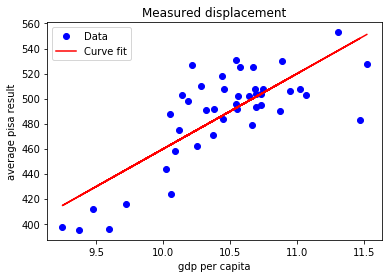

In [20]:
def fit_data(df_data1, df_data2, degree, x_label, y_label):
    """Plot data from df_data1 and df_data2 and try to fit a curve with a given degree
    :param df_data1: data frame
    :param df_data2: data frame
    :param degree: int 
    :param x_label: str
    :param y_label: str"""
    pylab.plot(df_data1, df_data2, 'bo', label='Data')
    pylab.title('Measured displacement')
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    model = pylab.polyfit(df_data1, df_data2, degree)
    est_y_vals = pylab.polyval(model, df_data1)
    pylab.plot(df_data1, est_y_vals, 'r', label='Curve fit')
    pylab.legend(loc='best')
    pylab.show()

#plot with curve
lin_ave_gdp_ppp_log_pisa = fit_data(pisa_ave_gdp_ppp_log['gdp_ppp_log'], pisa_ave_gdp_ppp_log['ave_result'], 1,
                                    'gdp per capita', 'average pisa result')

When you analyze the scatterplot there is one dot which seems to be an outlier from the linear model - it’s Luxembourg. It's a country that has been considered second richest in the world for many years lately. Luxembourg is a place with relative high income per capita and accoridng to Business Insider report this is due to the large number of people working in the tiny nation while living in surrounding France, Germany and Belgium (it can be even one quarter of the entire population, who are not included in GDP calculation [5]). When you exclude Luxembourg from the dataset the percentage of the variables that is explained by a linear model increases to 0.69, which is still moderate.

In [21]:
#leave LUX out as an outlier
pisa_ave_gdp_ppp_log_lux = pisa_ave_gdp_ppp_log[pisa_ave_gdp_ppp_log['Code'] != 'LUX']

#perform OLS
model_ave_gdp_ppp_log_lux = smf.ols(formula='ave_result ~ gdp_ppp_log', data=pisa_ave_gdp_ppp_log_lux).fit()

#show summary
model_ave_gdp_ppp_log_lux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ave_result   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     88.64
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           1.07e-11
Time:                        19:06:59   Log-Likelihood:                -188.68
No. Observations:                  42   AIC:                             381.4
Df Residuals:                      40   BIC:                             384.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -213.7856     74.507     -2.869      0.007    -364.369     -63.202
gdp_ppp_log    67.2200      7.140      9.415      0.000      52.790      81.650
==============================================================================
Omnibus:                        1.453   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.425
Skew:                           0.377   Prob(JB):                        0.490
Kurtosis:                       2.504   Cond. No.                         230.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression analysis should be able to produce an equation that will predict dependent variable (PISA result) using one or more independent variables (GDP per capita). Using just one indepent variable seeems insufficient to explain all the variability in dependent variable, but we can still try to undestrand how it could affect the outcome on its own. Interpreting our model coefficients we can say that after increasing GDP per capita by 1%, the average PISA result should go up by 0.67 points.

When running your regression, you are trying to discover whether the coefficients on your independent variables are really different from 0 (so the independent variables are having a genuine effect on your dependent variable) or if alternatively any apparent differences from 0 are just due to random chance. The null (default) hypothesis is always that each independent variable is having absolutely no effect (has a coefficient of 0) and you are looking for a reason to reject this theory [6].

The standard error is an estimate of the standard deviation of the coefficient, the amount it varies across cases. The t statistic is the coefficient divided by its standard error.  The p-value helps to determine the significance of the results (you get it by comparing the t statistic on your variable with values in the Student's t distribution). Here we have a very small p-value, which indicates strong evidence against the null hypothesis. It means we can reject the null hypothesis that GDP per capita does not have any effect on PISA results (you can say with a 100% probability of being correct that the variable is having some effect, assuming your model is specified correctly). Another way to undestrand the OLS is to examine confidence interval, which  are telling us that we are 95% confident that the "true" GDP per capita coefficient is between 0.53 and 0.82 points.

Even though the correlation indicator seems to be high, it's still important to note that it doesn't mean that high GDP per capita causes above average results in PISA test in a given country. 

## Government expenses on education per student 
The previous part of analysis showed that there is a reason to believe that richer countries have a better chance to gain key abilities and perform better in science for example. To better understand this relaton it seems reasonable to ask another question 

- does this edge comes strictly from spending more on education or maybe there are some other factors that influence good performance? The second part of this paper will be focused on analyzing relationship between goverment expenses on education per student and PISA results. 

I tried to find an indicator for total government expenses on education per student until he turns 15, but it turned out // WYJASNIC TROCHE LEPIJE DLACZEGO INNE NIE PASOWALY // that I had to use my custom made pointer. I made an assumption that before each student sat at PISA test at the age of 15 he or she probably had spent 12 years on learning in various institutions. I calculated expenses per student on each level of education among pre-primary, primary and lower secondary. Then I added them accordingly to years spent on each level by the student, who took test in 2015 (I assumed 3 years in pre-primary, 6 years in primary and 3 years in lower-secondary schools). For the calculation I used two indicators: 
- Goverment expenditure on education in PPP$ from UNESCO database
- Population of the official age (both sexes) form World Bank API 

//POKAZAC WYCINEK SUROWYCH DANYCH // co dokladnie mowia te dane, czy ujecie roczne, jaka jednostka itp.

In [22]:
def csv_data_by_list(file, codes_list):
    """Read in a file from pisaprojectdatafiles directory and select rows with countries codes from codes_list
    :param file: str
    :param codes_list: list"""
    df = pd.read_csv('pisaprojectdatafiles/{0}'.format(file))
    df_data = pd.DataFrame()
    for i in codes_list:
        df_data = df_data.append(df.loc[df['LOCATION'] == i], ignore_index=True)
    return df_data

#read in file and select given countries - source UNESCO database
gov_edu_expenses = csv_data_by_list('gov_exp_edu_ppp.csv', countries_codes)

def get_some_ind(df_data, indicators):
    """Take df_data and select rows for given indicators, then append it to df_data_ind
    :param df_data: data frame
    :param indicators: list"""
    df_data_ind = pd.DataFrame()
    for i in indicators:
        df_data_ind = df_data_ind.append(df_data.loc[df_data['EDULIT_IND'] == i], ignore_index=True)
    return df_data_ind

#select indicators: pre-primary, primary and lower secondary
basic_edu_exp = get_some_ind(gov_edu_expenses, ['X_PPP_02_FSGOV', 'X_PPP_1_FSGOV', 'X_PPP_2_FSGOV'])

def drop_col(df_data, del_col):
    """Take df_data and drop del_col columns from it
    :param df_data: data frame
    :param del_col: list"""
    for i in del_col:
        df_data.drop(i, axis=1, inplace=True)
    return df_data

#clean df - drop TIME, Flag Codes, Flags
basic_edu_exp = drop_col(basic_edu_exp, ['TIME', 'Flag Codes', 'Flags'])

#pivot df to get similar structure like student_count_data
basic_edu_exp = basic_edu_exp.pivot_table('Value', ['Country','Time'], 'EDULIT_IND')

#reset multiindex "Country' and 'Time'
basic_edu_exp.reset_index(level=['Country', 'Time'], inplace=True)

#rename column labels
basic_edu_exp = rename_col(
    basic_edu_exp, { 'X_PPP_02_FSGOV': 'pre_primary_exp', 'X_PPP_1_FSGOV': 'primary_exp', 'X_PPP_2_FSGOV': 'lower_sec_exp'})

#add new column with country code
basic_edu_exp = add_code_col(basic_edu_exp, name_code_map)

In [23]:
#read in file with student count for given countries
edu_indicators = {'SP.PRE.TOTL.IN':'pre_primary_pop', 'SP.PRM.TOTL.IN':'primary_pop', 'SP.SEC.LTOT.IN':'lower_sec_pop'}
"""indicators summary:
SP.PRE.TOTL.IN   	Population of the official age for pre-primary education, both sexes (number)
SP.PRM.TOTL.IN   	Population of the official age for primary education, both sexes (number)
SP.SEC.LTOT.IN   	Population of the official age for lower secondary education, both sexes (number)
"""
basic_student_pop = api_data(countries_codes, edu_indicators, 2003, 2014)

#reset multiindex "country' and 'date'
basic_student_pop.reset_index(level=['country', 'date'], inplace=True)

#rename column labels
basic_student_pop = rename_col(basic_student_pop, {'country': 'Country', 'date': 'Time'})

#change column order
basic_student_pop = basic_student_pop[['Country', 'Time', 'pre_primary_pop', 'primary_pop', 'lower_sec_pop']]

#add new column with country code
basic_student_pop = add_code_col(basic_student_pop, name_code_map)

In [24]:
#convert 'Time' column type to int
basic_edu_exp['Time'] = basic_edu_exp['Time'].apply(np.int16)
basic_student_pop['Time'] = basic_student_pop['Time'].apply(np.int16)

#merge basic_edu_exp and basic_student_pop, right method to stay with 2003-2014 period
edu_data_joined = pd.merge(basic_edu_exp, basic_student_pop, how='right', on=['Code', 'Time'])

#sort by 'Code' and 'Time' and reset index
edu_data_joined.sort_values(['Code', 'Time'], ascending=[True, True], inplace=True)
edu_data_joined.reset_index(level=0, drop=True, inplace=True)

def divide_col_by_col(df_data, dividends, divisors):
    """Takes df_data and divides columns accordingly by rule dividends/divisors, 
    returns df_data_div only with divided columns
    :param df_data: data frame
    :param dividends: list of column labels
    :param divisors: list of column labels
    :return: df_data_div: data frame
    """
    df_data_div = df_data.copy()
    for n in range(len(dividends)):
        df_data_div[n] = df_data_div[dividends[n]] / df_data_div[divisors[n]] * 1000000
    drop_col(df_data_div, [dividends + divisors])
    df_data_div.round(0)
    return df_data_div

#divide total expenses by number of students
edu_data_per_student = divide_col_by_col(edu_data_joined, ['pre_primary_exp', 'primary_exp', 'lower_sec_exp'],
                                         ['pre_primary_pop', 'primary_pop', 'lower_sec_pop'])

#drop unnecessary column
edu_data_per_student = drop_col(edu_data_per_student, ['Country_y'])

#rename column label
edu_data_per_student = rename_col(edu_data_per_student, {'Country_x': 'Country', 0: 'pre_primary_per_student',
                                                         1: 'primary_per_student', 2: 'lower_sec_per_student'})

At this point I had to take care of all the Nan values, mainly because of the lacks in expenses data. I decided to use interpolate method to handle missing data, but with some restrictions, to avoid estimation, when it's not enough information. For every country in my dataset I first checked the number of Nan in a given period I was interested in, which is: 2003-2005 for pre-primary, 2006-2011 for primary and 2012-2014 for lower-secondary education. If any lack occured, I examined the whole column for a given level of education and interpolated if the ratio of Nan in it was below 50%. As a result I had to get rid of 10 countries from my original dataset.

In [27]:
def estimate_total_cost(df_data):
    """Takes df_data and estimates total cost per student during 12 years of education
    :param df_data: data frame
    :returns total_cost: total_cost df with country Code and total cost"""
    total_cost = pd.DataFrame(columns=['Code', 'Total'])
    country_list = df_data.Code.unique()
    for country in country_list:
        country_df = df_data.loc[df_data['Code'] == country].copy()
        cost_pre_primary = sum_col(country_df, 0, 3, 'pre_primary_per_student')
        cost_primary = sum_col(country_df, 3, 9, 'primary_per_student')
        cost_second = sum_col(country_df, 9, 12, 'lower_sec_per_student')
        cost_temp = [cost_pre_primary, cost_primary, cost_second]
        for i in cost_temp:
            if i > 0:
                sum_temp = sum(cost_temp)
            else:
                sum_temp = 0
        total_cost = total_cost.append(pd.DataFrame([[country, sum_temp]], columns=['Code', 'Total']),
                                               ignore_index=True)
    return total_cost

def sum_col(country_df, index_start, index_end, label):
    """Helper function for estimate_total_cost, which calculate total cost for a single country
    :param country_df: data frame
    :param index_start: int
    :param index_end: int
    :param label: str
    :returns col_sum: int"""
    test_col = country_df[index_start:index_end][label]
    small_ratio = test_col.isnull().sum() / len(test_col.index)
    big_ratio = country_df[label].isnull().sum() / len(country_df.index)
    if small_ratio > 0:
        if big_ratio < 0.5:
            country_df.loc[:,label].interpolate(limit_direction='both', inplace=True)
            col_sum = sum(test_col)
        else:
            col_sum = 0
    else:
        col_sum = sum(test_col)
    return col_sum

#estimate total expenses per student in a given country
student_total_expenses = estimate_total_cost(edu_data_per_student)

#delete countries with zero data ([CAN, GRC, HKG, MAC, OAVG, SGP, TUR] [ISR, PER, SVN])
student_total_expenses = student_total_expenses[student_total_expenses.Total != 0]

#reset index
student_total_expenses.reset_index(drop=True, inplace=True)

In [28]:
student_total_expenses

,Code,Total
0,AUS,78816.502649
1,AUT,115410.228919
2,BRA,32170.622056
3,CHE,136036.662136
4,CHL,29453.162148
5,COL,18314.968248
6,CZE,56354.707893
7,DEU,81542.444479
8,DNK,117633.540538
9,ESP,81123.876956


## OLS for average PISA results and govermnent expenses on education per student 
As before, I tried to calculate regression coefficients and examine if expenses on education could affect PISA results. When you perform OLS on those variables it turns out that correlation between government expenses per student and average PISA test results is only 0.3. Again Luxembourg appears as an outlier. Unfortunately, even when I excluded it from the regression, the correlation was still quite low. It is even more clear when you look at the scatterplot, that the relation between those variables may not be linear.

In [29]:
#merge with average PISA results
pisa_ave_expenses = pd.merge(all_pisa_2015_ave, student_total_expenses, on='Code')

#rename column label
rename_col(pisa_ave_expenses, {'Country_x': 'Country'})

#leave LUX out as an outlier
pisa_ave_expenses_lux = pisa_ave_expenses[pisa_ave_expenses['Code'] != 'LUX']

#perform OLS
model_ave_expenses_lux = smf.ols(formula='ave_result ~ Total', data=pisa_ave_expenses_lux).fit()

#show summary
model_ave_expenses_lux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ave_result   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     24.39
Date:                Sat, 11 Nov 2017   Prob (F-statistic):           3.00e-05
Time:                        19:17:43   Log-Likelihood:                -145.33
No. Observations:                  31   AIC:                             294.7
Df Residuals:                      29   BIC:                             297.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    429.9186     12.341     34.836      0.000     404.678     455.160
Total          0.0007      0.000      4.939      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.183   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.389
Skew:                           0.084   Prob(JB):                        0.823
Kurtosis:                       2.478   Cond. No.                     2.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

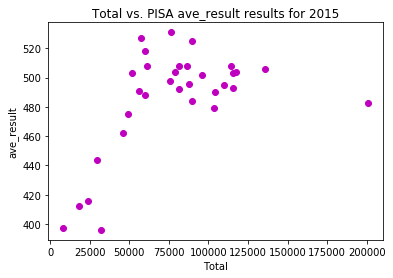

In [30]:
def show_scatterplot(df_data, variables, color):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of str
    :param color: str"""
    plt.scatter(x=df_data[variables[0]],y=df_data[variables[1]], color=color)
    plt.title(variables[0] + ' vs. PISA ' + variables[1] + ' results for 2015')
    plt.xlabel(variables[0])
    plt.ylabel(variables[1])
    plt.show()

#plot
plot_ave_expenses = show_scatterplot(pisa_ave_expenses, ['Total', 'ave_result'], 'm')

## Summary
The results of analysis show that there is a moderate linear correlation between country GDP per capita and average PISA results. It's hard to question the fact that rich countries perform better in the assesment, but it is still hard to tell if their wealth is the reason for that. The second part of the paper based on the relation between government expenses on education and average test results proved that there is some correlation and it's hard to reject the null hypotesis that the connection is not valid, but it seems that linear model doesn't have the power to explain this phenomena. 

I decided to write second part of the analysis. It will include fitting different curves to both datasets including polynomials of different degrees and exponential function. Then I'll do some cross-validation to check the prediction power of tested model. The last part will be about unsupervised learning using clustering methods.